In [19]:
#At the part i retrieve ta data from the the link that you gave us
#and i bulid a dataframe keeping only the numeric values.
#then i split the data to train and test with a 80 - 20 ratio and
#i apply the LinearRegression printing the coefficients and the mean squared error
#and variance score.
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,SGDClassifier,SGDRegressor
mydata = pd.read_csv("https://raw.githubusercontent.com/MSc-in-Data-Science/class_material/master/semester_1/Machine_Learning/datasets/bike-sharing-dataset/day.csv")
mydata = mydata.drop(['dteday'], axis=1)
X=pd.DataFrame(mydata,  columns=['weathersit','temp','atemp','hum','windspeed'])

columns=['weathersit','temp','atemp','hum','windspeed']

y=mydata['cnt']
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]



regr =  LinearRegression()

regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))






Coefficients: 
 [ -460.26128594  2726.21647615  4179.36963461 -1958.29657852
 -3957.51630614]
Mean squared error: 1732342.30
Variance score: 0.43


TypeError: 'loss' is an invalid keyword argument for this function

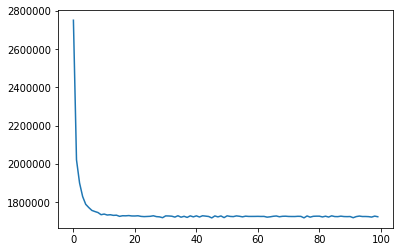

In [20]:
#At this part we can see the plot for the coverage of gradient descent proccess.
#using different values for alpha parameter.I kept the value 1 because we can see from the plots that
#the proccess is coveraging with less epochs needed.
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = SGDRegressor(loss='squared_loss', alpha=1,max_iter=100 ,verbose=1)
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.savefig("warmstart_plots/pure_SGD:"+str(loss='squared_loss')+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.close()



-- Epoch 1
Norm: 678.01, NNZs: 1, Bias: 1970.000000, T: 1, Avg. loss: 485112.500000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 160.62, NNZs: 1, Bias: -466.696640, T: 1, Avg. loss: 742186.314498
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 876.68, NNZs: 1, Bias: 2547.257937, T: 1, Avg. loss: 1135490.273758
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 406.36, NNZs: 1, Bias: -1180.708048, T: 1, Avg. loss: 1737216.298134
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1180.64, NNZs: 1, Bias: 3430.419967, T: 1, Avg. loss: 2657812.696639
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 782.32, NNZs: 1, Bias: -2273.092796, T: 1, Avg. loss: 4066257.228880
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1645.67, NNZs: 1, Bias: 4781.592679, T: 1, Avg. loss: 6221073.393293
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1357.52, NNZs: 1, Bias: -3944.360820, T: 1, Avg. loss: 9517783.058550
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2357.13, NNZs: 1, B

/opt/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


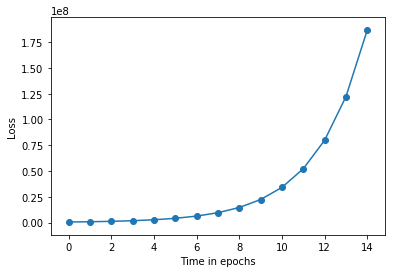

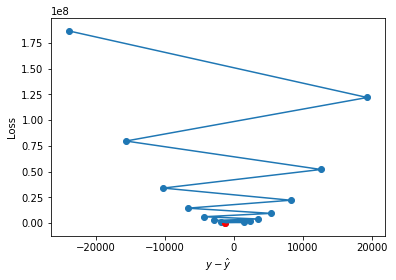

In [21]:
#at this part we can see the loss plot rescecting (y-y_hat)

X = mydata['temp']
y=mydata['cnt']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)



old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

n = 1 ;# number of instances to keep
fX = X[:n]
fy = y[:n]
learning_rate =2
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                   average=False, random_state=2018, verbose=1)

p_sum = [] ;# this holds the sum of y-y_hat, for instances (just one in our case) 
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model = sgd.partial_fit(fX, fy)
    #print(model.coef_)
    y = model.predict(fX)
    p_sum.append(np.sum(fy-y))
    #print(y, fy, np.sum(fy-y))
    
    
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))   
    

print(model.coef_)
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show() 

plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()
